In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [61]:
import pandas as pd
from pathlib import Path
import numpy as np

In [4]:
fpath = Path('/app/data/raw/communities-2022-05-31-1915GMT.zip')
assert fpath.exists()

In [6]:
j40 = pd.read_csv(fpath, compression='zip', delimiter=',',)

In [8]:
# ridiculously long names for arbitrary derived metrics
j40.columns

Index(['Census tract ID', 'County Name', 'State/Territory',
       'Total threshold criteria exceeded', 'Total categories exceeded',
       'Identified as disadvantaged', 'Total population',
       'Is low income and high percent of residents that are not higher ed students?',
       'Greater than or equal to the 90th percentile for expected agriculture loss rate, is low income, and high percent of residents that are not higher ed students?',
       'Expected agricultural loss rate (Natural Hazards Risk Index) (percentile)',
       'Expected agricultural loss rate (Natural Hazards Risk Index)',
       'Greater than or equal to the 90th percentile for expected building loss rate, is low income, and high percent of residents that are not higher ed students?',
       'Expected building loss rate (Natural Hazards Risk Index) (percentile)',
       'Expected building loss rate (Natural Hazards Risk Index)',
       'Greater than or equal to the 90th percentile for expected population loss rat

In [14]:
# most derived columns end with '?'
main_cols = [col for col in j40.columns if not col.endswith('?')]
derived_cols = [col for col in j40.columns if col.endswith('?')]

In [12]:
j40[main_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74134 entries, 0 to 74133
Data columns (total 58 columns):
 #   Column                                                                                                    Non-Null Count  Dtype  
---  ------                                                                                                    --------------  -----  
 0   Census tract ID                                                                                           74134 non-null  int64  
 1   County Name                                                                                               74002 non-null  object 
 2   State/Territory                                                                                           74134 non-null  object 
 3   Total threshold criteria exceeded                                                                         74134 non-null  int64  
 4   Total categories exceeded                                                   

In [15]:
j40[derived_cols]

,Is low income and high percent of residents that are not higher ed students?,"Greater than or equal to the 90th percentile for expected agriculture loss rate, is low income, and high percent of residents that are not higher ed students?","Greater than or equal to the 90th percentile for expected building loss rate, is low income, and high percent of residents that are not higher ed students?","Greater than or equal to the 90th percentile for expected population loss rate, is low income, and high percent of residents that are not higher ed students?","Greater than or equal to the 90th percentile for energy burden, is low income, and high percent of residents that are not higher ed students?","Greater than or equal to the 90th percentile for PM2.5 exposure, is low income, and high percent of residents that are not higher ed students?","Greater than or equal to the 90th percentile for diesel particulate matter, is low income, and high percent of residents that are not higher ed students?","Greater than or equal to the 90th percentile for traffic proximity, is low income, and high percent of residents that are not higher ed students?","Greater than or equal to the 90th percentile for housing burden, is low income, and high percent of residents that are not higher ed students?","Greater than or equal to the 90th percentile for lead paint, the median house value is less than 90th percentile, is low income, and high percent of residents that are not higher ed students?",...,"Greater than or equal to the 90th percentile for diabetes, is low income, and high percent of residents that are not higher ed students?","Greater than or equal to the 90th percentile for heart disease, is low income, and high percent of residents that are not higher ed students?","Greater than or equal to the 90th percentile for low life expectancy, is low income, and high percent of residents that are not higher ed students?","Greater than or equal to the 90th percentile for low median household income as a percent of area median income, has low HS attainment, and high percent of residents that are not higher ed students?","Greater than or equal to the 90th percentile for households in linguistic isolation, has low HS attainment, and high percent of residents that are not higher ed students?","Greater than or equal to the 90th percentile for unemployment, has low HS attainment, and high percent of residents that are not higher ed students?","Greater than or equal to the 90th percentile for households at or below 100% federal poverty level, has low HS attainment, and high percent of residents that are not higher ed students?",Greater than or equal to the 90th percentile for unemployment and has low HS education in 2009 (island areas)?,Greater than or equal to the 90th percentile for households at or below 100% federal poverty level and has low HS education in 2009 (island areas)?,Greater than or equal to the 90th percentile for low median household income as a percent of area median income and has low HS education in 2009 (island areas)?
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74129,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
74130,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,

## QA
### Accuracy
Out of scope - take at face value
### Atomicity
Check for multi-valued entries. I don't see any.

In [29]:
j40.dtypes.value_counts()

float64    52
bool       26
int64       3
object      2
dtype: int64

Only 2 object columns to check (the rest are float/bool/int)

In [31]:
j40.select_dtypes('object').sample(2)

,County Name,State/Territory
15731,Lee County,Florida
45717,New York County,New York


In [33]:
# no multi-valued
j40['State/Territory'].value_counts(dropna=False)

California                  8057
Texas                       5265
New York                    4919
Florida                     4245
Pennsylvania                3218
Illinois                    3123
Ohio                        2952
Michigan                    2813
North Carolina              2195
New Jersey                  2010
Georgia                     1969
Virginia                    1907
Arizona                     1526
Indiana                     1511
Tennessee                   1497
Massachusetts               1478
Washington                  1458
Wisconsin                   1409
Maryland                    1406
Missouri                    1393
Minnesota                   1338
Colorado                    1249
Alabama                     1181
Louisiana                   1148
Kentucky                    1115
South Carolina              1103
Oklahoma                    1046
Puerto Rico                  945
Oregon                       834
Connecticut                  833
Iowa      

<AxesSubplot: >

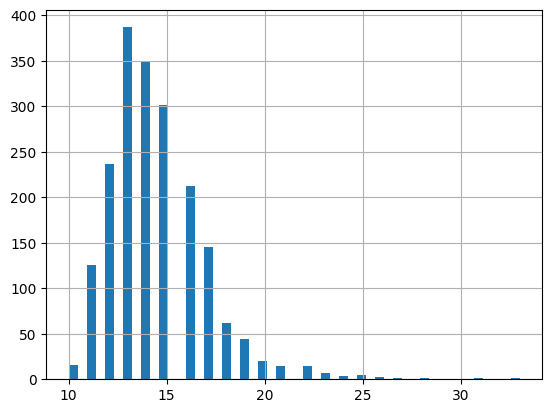

In [44]:
# no multi-valued
counties = pd.Series(j40['County Name'].unique())
counties.str.len().hist(bins=50)

In [41]:
# None of longest names appear multivalued
counties[counties.str.len().nlargest(10).index]

87     Prince of Wales-Hyder Census Area
90       Southeast Fairbanks Census Area
74          Fairbanks North Star Borough
795          St. John the Baptist Parish
68            Aleutians West Census Area
81            Lake and Peninsula Borough
91            Valdez-Cordova Census Area
76             Hoonah-Angoon Census Area
79             Ketchikan Gateway Borough
82             Matanuska-Susitna Borough
dtype: object

In [42]:
# no common string separators
counties.str.contains(',|;|&|\||\t', regex=True).any()

False

### Completeness
* No tracts missing: googling "how many census tracts 2010" gives 74134, which is exactly the size of this dataset. Note the use of 2010 Census (per documentation), not 2020.
* 28% of wastewater data is missing. Be wary of metrics derived from this column.
* 10% of life expectancy data is missing. Be wary of metrics derived from this column.
* most others are 1% missing or less
* lots of data is missing for territories, especially outside Puerto Rico

The docs mention some data sources are not available for territories, so I expect a fair amount of missing data there.

In [45]:
state_or_territory = {
    "Alabama": "state",
    "Alaska": "state",
    "Arizona": "state",
    "Arkansas": "state",
    "California": "state",
    "Colorado": "state",
    "Connecticut": "state",
    "Delaware": "state",
    "Florida": "state",
    "Georgia": "state",
    "Hawaii": "state",
    "Idaho": "state",
    "Illinois": "state",
    "Indiana": "state",
    "Iowa": "state",
    "Kansas": "state",
    "Kentucky": "state",
    "Louisiana": "state",
    "Maine": "state",
    "Maryland": "state",
    "Massachusetts": "state",
    "Michigan": "state",
    "Minnesota": "state",
    "Mississippi": "state",
    "Missouri": "state",
    "Montana": "state",
    "Nebraska": "state",
    "Nevada": "state",
    "New Hampshire": "state",
    "New Jersey": "state",
    "New Mexico": "state",
    "New York": "state",
    "North Carolina": "state",
    "North Dakota": "state",
    "Ohio": "state",
    "Oklahoma": "state",
    "Oregon": "state",
    "Pennsylvania": "state",
    "Rhode Island": "state",
    "South Carolina": "state",
    "South Dakota": "state",
    "Tennessee": "state",
    "Texas": "state",
    "Utah": "state",
    "Vermont": "state",
    "Virginia": "state",
    "Washington": "state",
    "West Virginia": "state",
    "Wisconsin": "state",
    "Wyoming": "state",
    "District of Columbia": "DC",
    "Puerto Rico": "territory",
    "Guam": "territory",
    "Virgin Islands": "territory",
    "Northern Mariana Islands": "territory",
    "American Samoa": "territory",
}

In [46]:
categories = j40['State/Territory'].map(state_or_territory)

In [50]:
pd.options.display.max_rows = 100

In [51]:
j40.isna().groupby(categories).agg(['count', 'sum', 'mean']).T.unstack()

State/Territory                                        DC                  \
                                                    count   sum      mean   
Census tract ID                                     179.0   0.0  0.000000   
County Name                                         179.0   0.0  0.000000   
State/Territory                                     179.0   0.0  0.000000   
Total threshold criteria exceeded                   179.0   0.0  0.000000   
Total categories exceeded                           179.0   0.0  0.000000   
Identified as disadvantaged                         179.0   0.0  0.000000   
Total population                                    179.0   0.0  0.000000   
Is low income and high percent of residents tha...  179.0   0.0  0.000000   
Greater than or equal to the 90th percentile fo...  179.0   0.0  0.000000   
Expected agricultural loss rate (Natural Hazard...  179.0   0.0  0.000000   
Expected agricultural loss rate (Natural Hazard...  179.0   0.0  0.000000   
Greater than or equal to the 90th percentile fo...  179.0   0.0  0.000000   
Expected building loss rate (Natural Hazards Ri...  179.0   0.0  0.000000   
Expected building loss rate (Natural Hazards Ri...  179.0   0.0  0.000000   
Greater than or equal to the 90th percentile fo...  179.0   0.0  0.000000   
Expected population loss rate (Natural Hazards ...  179.0   0.0  0.000000   
Expected population loss rate (Natural Hazards ...  179.0   0.0  0.000000   
Greater than or equal to the 90th percentile fo...  179.0   0.0  0.000000   
Energy burden (percentile)                          179.0   1.0  0.005587   
Energy burden                                       179.0   1.0  0.005587   
Greater than or equal to the 90th percentile fo...  179.0   0.0  0.000000   
PM2.5 in the air (percentile)                       179.0   0.0  0.000000   
PM2.5 in the air                                    179.0   0.0  0.000000   
Greater than or equal to the 90th percentile fo...  179.0   0.0  0.000000   
Diesel particulate matter exposure (percentile)     179.0   0.0  0.000000   
Diesel particulate matter exposure                  179.0   0.0  0.000000   
Greater than or equal to the 90th percentile fo...  179.0   0.0  0.000000   
Traffic proximity and volume (percentile)           179.0   0.0  0.000000   
Traffic proximity and volume                        179.0   0.0  0.000000   
Greater than or equal to the 90th percentile fo...  179.0   0.0  0.000000   
Housing burden (percent) (percentile)               179.0   2.0  0.011173   
Housing burden (percent)                            179.0   2.0  0.011173   
Greater than or equal to the 90th percentile fo...  179.0   0.0  0.000000   
Percent pre-1960s housing (lead paint indicator...  179.0   0.0  0.000000   
Percent pre-1960s housing (lead paint indicator)    179.0   0.0  0.000000   
Median value ($) of owner-occupied housing unit...  179.0   5.0  0.027933   
Median value ($) of owner-occupied housing units    179.0   5.0  0.027933   
Greater than or equal to the 90th percentile fo...  179.0   0.0  0.000000   
Proximity to hazardous waste sites (percentile)     179.0   0.0  0.000000   
Proximity to hazardous waste sites                  179.0   0.0  0.000000   
Greater than or equal to the 90th percentile fo...  179.0   0.0  0.000000   
Proximity to NPL (Superfund) sites (percentile)     179.0   0.0  0.000000   
Proximity to NPL (Superfund) sites                  179.0   0.0  0.000000   
Greater than or equal to the 90th percentile fo...  179.0   0.0  0.000000   
Proximity to Risk Management Plan (RMP) facilit...  179.0   0.0  0.000000   
Proximity to Risk Management Plan (RMP) facilities  179.0   0.0  0.000000   
Greater than or equal to the 90th percentile fo...  179.0   0.0  0.000000   
Wastewater discharge (percentile)                   179.0   7.0  0.039106   
Wastewater discharge                                179.0   7.0  0.039106   
Greater than or equal to the 90th percentile fo...  179.0   0.0  0.000000

In [54]:
# This shows that derived metrics fill missing values with "False"
# So if ANY of the dependencies are missing, the metric returns "False"
j40.loc[j40['PM2.5 in the air'].isna(), "Greater than or equal to the 90th percentile for PM2.5 exposure, is low income, and high percent of residents that are not higher ed students?"].value_counts(dropna=False)

False    1875
Name: Greater than or equal to the 90th percentile for PM2.5 exposure, is low income, and high percent of residents that are not higher ed students?, dtype: int64

### Consistency
Rather than check state/county name consistency, I'll just replace them with standard values based on the tract FIPS code.
### Uniformity
Not much to check - most columns are percentiles, categories, or unitless indicies. The health columns have no info about units -- have to check primary sources for that.
### Validity
#### Range
* ~~702 tracts with 0 reported population.~~ After more research, this is expected. Some Census tracts contain uninhabited areas like military storage sites.
* 12 tracts have median home value of 9999 (I think should be NaN)

In [57]:
j40[main_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Census tract ID,74134.0,2.846300e+10,1.655049e+10,1.001020e+09,1.304703e+10,2.804900e+10,4.200347e+10,7.803099e+10
Total threshold criteria exceeded,74134.0,1.218658e+00,2.347301e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.500000e+01
Total categories exceeded,74134.0,8.492729e-01,1.502680e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,8.000000e+00
Total population,73976.0,4.409082e+03,2.284231e+03,0.000000e+00,2.903000e+03,4.113000e+03,5.525000e+03,7.027100e+04
Expected agricultural loss rate (Natural Hazards Risk Index) (percentile),72738.0,3.401196e+01,3.315649e+01,0.000000e+00,0.000000e+00,2.700000e+01,6.300000e+01,1.000000e+02
Expected agricultural loss rate (Natural Hazards Risk Index),72738.0,4.689498e-01,1.792348e+00,0.000000e+00,0.000000e+00,1.220000e-02,2.743000e-01,4.735400e+01
Expected building loss rate (Natural Hazards Risk Index) (percentile),72687.0,4.950222e+01,2.886472e+01,0.000000e+00,2.500000e+01,5.000000e+01,7.500000e+01,1.000000e+02
Expected building loss rate (Natural Hazards Risk Index),72687.0,3.671701e-02,8.631392e-02,0.000000e+00,4.500000e-03,1.410000e-02,3.500000e-02,2.533700e+00
Expected population loss rate (Natural Hazards Risk Index) (percentile),72530.0,4.950006e+01,2.886697e+01,0.000000e+00,2.500000e+01,5.000000e+01,7.475000e+01,1.000000e+02
Expected population loss rate (Natural Hazards Risk Index),72530.0,3.987385e-04,1.795532e-03,0.000000e+00,1.000000e-04,2.000000e-04,4.000000e-04,2.122000e-01


<AxesSubplot: >

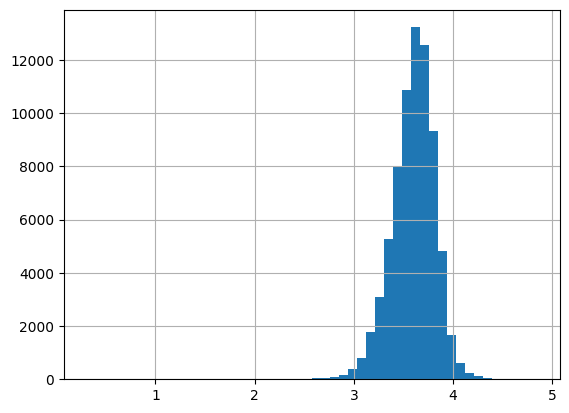

In [63]:
j40['Total population'].replace(0, np.nan).transform(np.log10).hist(bins=50)

In [58]:
j40.loc[j40['Total population'].eq(0),:]

,Census tract ID,County Name,State/Territory,Total threshold criteria exceeded,Total categories exceeded,Identified as disadvantaged,Total population,Is low income and high percent of residents that are not higher ed students?,"Greater than or equal to the 90th percentile for expected agriculture loss rate, is low income, and high percent of residents that are not higher ed students?",Expected agricultural loss rate (Natural Hazards Risk Index) (percentile),...,Percent of individuals < 100% Federal Poverty Line (percentile),Percent of individuals < 100% Federal Poverty Line,Percent individuals age 25 or over with less than high school degree (percentile),Percent individuals age 25 or over with less than high school degree,Unemployment (percent) in 2009 (island areas) and 2010 (states and PR),Percentage households below 100% of federal poverty line in 2009 (island areas) and 2010 (states and PR),Greater than or equal to the 90th percentile for unemployment and has low HS education in 2009 (island areas)?,Greater than or equal to the 90th percentile for households at or below 100% federal poverty level and has low HS education in 2009 (island areas)?,Greater than or equal to the 90th percentile for low median household income as a percent of area median income and has low HS education in 2009 (island areas)?,Percent of residents who are not currently enrolled in higher ed
43,1003990000,Baldwin County,Alabama,0,0,False,0.0,False,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,NaN
106,1015981901,Calhoun County,Alabama,0,0,False,0.0,False,False,73.0,...,NaN,NaN,NaN,NaN,0.0,0.0,False,False,False,NaN
107,1015981902,Calhoun County,Alabama,0,0,False,0.0,False,False,72.0,...,NaN,NaN,NaN,NaN,0.0,0.0,False,False,False,NaN
108,1015981903,Calhoun County,Alabama,0,0,False,0.0,False,False,60.0,...,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,NaN
868,1097990000,Mobile County,Alabama,0,0,False,0.0,False,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74027,72137990000,Toa Baja Municipio,Puerto Rico,0,0,False,0.0,False,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,NaN
74058,72143990000,Vega Alta Municipio,Puerto Rico,0,0,False,0.0,False,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,NaN
74072,72145990000,Vega Baja Municipio,Puerto Rico,0,0,False,0.0,False,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,NaN
74075,72147990000,Vieques Municipio,Puerto Rico,0,0,False,0.0,False,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,NaN


<AxesSubplot: >

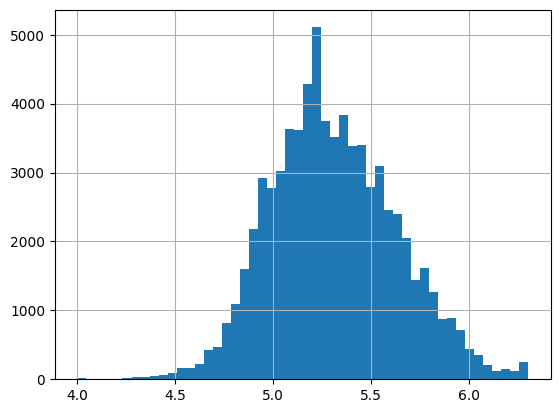

In [64]:
j40['Median value ($) of owner-occupied housing units'].transform(np.log10).hist(bins=50)

In [65]:
j40['Median value ($) of owner-occupied housing units'].nsmallest(5)

2080     9999.0
22367    9999.0
27162    9999.0
27830    9999.0
29445    9999.0
Name: Median value ($) of owner-occupied housing units, dtype: float64

In [66]:
j40['Median value ($) of owner-occupied housing units'].nlargest(5)

3713    2000001.0
3863    2000001.0
5185    2000001.0
5188    2000001.0
5317    2000001.0
Name: Median value ($) of owner-occupied housing units, dtype: float64

In [67]:
j40['Median value ($) of owner-occupied housing units'].eq(9999.0).sum()

12

#### Uniqueness

In [93]:
# IDs are unique!
j40['Census tract ID'].is_unique

True

In [96]:
# some rows are duplicated with different IDs -- maybe lots of NaN?
j40.drop(columns='Census tract ID').duplicated().sum()

65

In [104]:
# yes, huge amount of nan
j40[j40.drop(columns='Census tract ID').duplicated(keep=False)].isna().sum(axis=1).value_counts()

43    69
53    17
51     8
dtype: int64

In [99]:
# basically all NaN, False, and 0 values. Not a real problem
j40[j40.drop(columns='Census tract ID').duplicated(keep=False)].sort_values('Census tract ID')

,Census tract ID,County Name,State/Territory,Total threshold criteria exceeded,Total categories exceeded,Identified as disadvantaged,Total population,Is low income and high percent of residents that are not higher ed students?,"Greater than or equal to the 90th percentile for expected agriculture loss rate, is low income, and high percent of residents that are not higher ed students?",Expected agricultural loss rate (Natural Hazards Risk Index) (percentile),...,Percent of individuals < 100% Federal Poverty Line (percentile),Percent of individuals < 100% Federal Poverty Line,Percent individuals age 25 or over with less than high school degree (percentile),Percent individuals age 25 or over with less than high school degree,Unemployment (percent) in 2009 (island areas) and 2010 (states and PR),Percentage households below 100% of federal poverty line in 2009 (island areas) and 2010 (states and PR),Greater than or equal to the 90th percentile for unemployment and has low HS education in 2009 (island areas)?,Greater than or equal to the 90th percentile for households at or below 100% federal poverty level and has low HS education in 2009 (island areas)?,Greater than or equal to the 90th percentile for low median household income as a percent of area median income and has low HS education in 2009 (island areas)?,Percent of residents who are not currently enrolled in higher ed
7074,6037990100,Los Angeles County,California,0,0,False,0.0,False,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,NaN
7075,6037990200,Los Angeles County,California,0,0,False,0.0,False,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,NaN
7076,6037990300,Los Angeles County,California,0,0,False,0.0,False,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,NaN
15150,12037990000,Franklin County,Florida,0,0,False,0.0,False,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,NaN
15151,12037990100,Franklin County,Florida,0,0,False,0.0,False,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,NaN
16725,12091990100,Okaloosa County,Florida,0,0,False,0.0,False,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,NaN
16726,12091990200,Okaloosa County,Florida,0,0,False,0.0,False,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,NaN
17703,12103990000,Pinellas County,Florida,0,0,False,0.0,False,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,NaN
17704,12103990100,Pinellas County,Florida,0,0,False,0.0,False,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,NaN
20343,15001990000,Hawaii County,Hawaii,0,0,False,0.0,False,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,NaN


#### Set Membership
Only categorical columns are county/state. Again I'll just join those in via FIPS codes rather than QAing them.
#### Type
A bunch of nullable integer columns are currently float. But pandas built-in `convert_dtypes` should fix those.
#### Cross-Field
Could check all the derived metrics, but for the sake of time I'll spot check a couple and take the rest at face value. I successfully reproduced 2/2 derived metrics. BUT the given percentiles cannot be rederived from the given values (see below).

##### **Metrics**
According to [the documentation](https://static-data-screeningtool.geoplatform.gov/data-pipeline/data/score/downloadable/cejst_technical_support_document.pdf) (pg 15),
> * "The cutoff value for all environmental or climate indicators that use percentiles is the 90th percentile"
> * "The cutoff for the low income indicator (<200% of the Federal poverty line) is 65th percentile"
> * "80% or more of individuals ... are not currently attending higher education"
> * "10% or more of the percent of adults 25 or older living in the census tract have not attained a high school degree"

In [77]:
rng = np.random.default_rng(seed=42)

In [78]:
rng.choice(derived_cols, size=2)

array(['Greater than or equal to the 90th percentile for expected building loss rate, is low income, and high percent of residents that are not higher ed students?',
       'Greater than or equal to the 90th percentile for households in linguistic isolation, has low HS attainment, and high percent of residents that are not higher ed students?'],
      dtype='<U198')

In [79]:
# Greater than or equal to the 90th percentile for expected building loss rate, is low income, and high percent of residents that are not higher ed students?
building_loss = j40['Expected building loss rate (Natural Hazards Risk Index) (percentile)'] >= 90
low_income = j40['Percent of individuals below 200% Federal Poverty Line (percentile)'] >= 65
higher_ed = j40['Percent of residents who are not currently enrolled in higher ed'] >= 80

In [80]:
reproduced1 = building_loss & low_income & higher_ed

In [82]:
j40['Greater than or equal to the 90th percentile for expected building loss rate, is low income, and high percent of residents that are not higher ed students?'].eq(reproduced1).all()

True

In [83]:
# Greater than or equal to the 90th percentile for households in linguistic isolation, has low HS attainment, and high percent of residents that are not higher ed students?
linguistic_iso = j40['Linguistic isolation (percent) (percentile)'] >= 90
low_high_school = j40['Percent individuals age 25 or over with less than high school degree'] >= 10

In [84]:
reproduced2 = linguistic_iso & low_high_school & higher_ed

In [85]:
j40['Greater than or equal to the 90th percentile for households in linguistic isolation, has low HS attainment, and high percent of residents that are not higher ed students?'].eq(reproduced2).all()

True

##### **Percentiles**
There are 2x as many unique percentiles as values for `Energy Burden`???

In [90]:
j40['Energy burden'].nunique()

28

In [91]:
j40['Energy burden (percentile)'].nunique()

56